In [1]:
import functions as f
import parameters as p
import run_statistics as stats
import train_network

import network
import os

Device: cuda
-- Data Parameters --
using Resolution: 224
using # actions: 25
-- Training Parameters --
using training data: E:\ILSVRC2017\10classesfirst\nofoveation\train
using test data: E:\ILSVRC2017\10classesfirst\nofoveation\test
using q-table for training data: Q_tables\Q_table_strongfoveated_first10.csv
using q-table for test data: Q_tables\Q_table_strongfoveated_first10.csv
using batch size: 32
using # epochs: 150


In [2]:
paths = os.listdir(p.CHECKPOINT_DIR)
print(paths)

['01-02-2020 default second data', '04-02-2020 10classesfirst', '31-01-2020 default']


In [3]:
m = network.DQN(p.RESOLUTION, p.RESOLUTION, p.N_ACTIONS)
m.to(p.DEVICE)
loader_test, idx_to_class = f.loader(p.DATA_PATH_TEST, transform=p.TRANSFORM, batch_size=p.BATCH_SIZE, shuffle=False)

In [4]:
def process_run(m, path):
    run = f.Run(p.CHECKPOINT_DIR + '\\{}'.format(path))
    run.plot_loss()
    print(run.lowest_validation(5))

    start_epoch, m = f.load_checkpoint(run.get_checkpoint(str(run.lowest_validation(5).index[0])), m)
    m.eval()
    #random_losses = stats.generate_random(idx_to_class, loader_test)
    #predicted_losses, target_losses, center_locations = stats.generate_predictions(idx_to_class, loader_test, m)
    #stats.print_results(predicted_losses, target_losses)
    train_network.validate_model(m, loader_test, idx_to_class)

using: E:\Dropbox\Documents\Year4\BachelorThesis\UsingASecondaryNetworkForFoveationInComputerVision\checkpoints\04-02-2020 10classesfirst 
 reading results from E:\Dropbox\Documents\Year4\BachelorThesis\UsingASecondaryNetworkForFoveationInComputerVision\checkpoints\04-02-2020 10classesfirst\results.txt


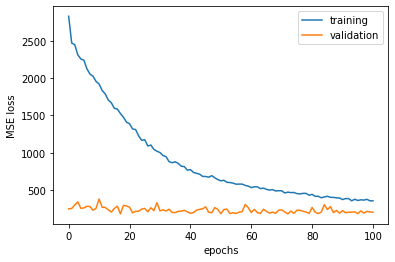

    validation     training
17  177.976398  1525.930579
72  178.946350   470.583957
50  181.136615   622.271702
95  182.373733   358.373200
82  183.038114   415.128716


  0%|                                                                                                                                  | 0/32 [00:00<?, ?it/s]

loading checkpoint
validating ...


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 32/32 [00:21<00:00,  1.46it/s]


running [validation] loss over 32 batches 177.9763983490371
actions: [(1, 11), (3, 25), (6, 411), (7, 9), (8, 2), (9, 2), (10, 87), (11, 24), (12, 145), (13, 63), (15, 10), (16, 102), (17, 21), (18, 41), (19, 3), (20, 12), (21, 17), (22, 15)]

 === predicted vs target ===
Better performance of the network then center on the 1000 test images: 44.2%
Equal performance of the network then center on the 1000 test images: 14.5%
Worse performance of the network then center on the 1000 test images: 41.3%
WilcoxonResult(statistic=172826.0, pvalue=0.1602198893878114)
WilcoxonResult(statistic=172826.0, pvalue=0.0801099446939057)


In [5]:
process_run(m, paths[1])

using: E:\Dropbox\Documents\Year4\BachelorThesis\UsingASecondaryNetworkForFoveationInComputerVision\checkpoints\01-02-2020 new params second data 
 reading results from E:\Dropbox\Documents\Year4\BachelorThesis\UsingASecondaryNetworkForFoveationInComputerVision\checkpoints\01-02-2020 new params second data\results.txt


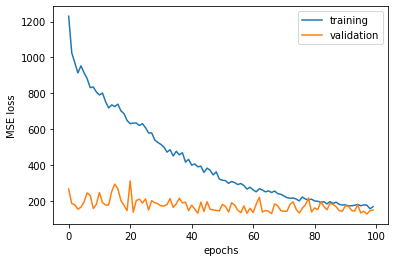

    validation    training
97  125.990051  175.001502
66  127.358498  245.385501
58  129.854542  264.722900
42  130.133636  389.227795
75  130.868266  198.307964


  0%|                                                                | 0/16 [00:00<?, ?it/s]

loading checkpoint
validating ...


100%|███████████████████████████████████████████████████████| 16/16 [00:09<00:00,  1.61it/s]

running [validation] loss over 16 batches 252.23944510412048
actions: [(0, 20), (1, 11), (5, 14), (6, 162), (7, 35), (11, 6), (12, 101), (16, 11), (17, 105), (18, 21), (19, 8), (23, 6)]

 === predicted vs target ===
Better performance of the network then center on the 500 test images: 30.6%
Equal performance of the network then center on the 500 test images: 20.2%
Worse performance of the network then center on the 500 test images: 49.2%
WilcoxonResult(statistic=29224.0, pvalue=3.629757962907181e-06)


In [6]:
process_run(m, paths[0])